In [2]:
!pip install pycaret


In [0]:
from pycaret.utils import enable_colab

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gregobrien1613/used-car-prices/Michael/final_data.csv'
dataset = pd.read_csv(url, index_col=0)
dataset.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [5]:
dataset = dataset.drop(columns=['Id', 'Vin', 'City', 'State'])
dataset = dataset.sample(frac=0.07, axis=None)
dataset.shape

(86144, 5)

In [0]:
from pycaret.regression import *

In [7]:
exp_reg101 = setup(data = dataset, 
                   target = 'Price', 
                   remove_outliers = True,
                   session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(86144, 5)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4084.1983,3.323294e+07,5764.8014,0.7421,0.2608,0.2204
1,4021.7066,3.091145e+07,5559.8063,0.7542,0.2571,0.2179
2,4038.3459,3.270962e+07,5719.2322,0.7400,0.2631,0.2219
3,3932.7181,3.028450e+07,5503.1351,0.7547,0.2649,0.2238
4,3935.5096,2.999721e+07,5476.9709,0.7375,0.2646,0.2225
5,3960.6223,3.035143e+07,5509.2134,0.7562,0.2600,0.2185
6,3995.5399,2.969559e+07,5449.3656,0.7548,0.2617,0.2210
7,4044.6972,3.138333e+07,5602.0829,0.7511,0.2674,0.2287
8,3912.0744,2.823229e+07,5313.4068,0.7595,0.2579,0.2189
9,4045.0533,3.680224e+07,6066.4850,0.7081,0.2641,0.2240


In [9]:
tuned_cat = tune_model('catboost', n_iter = 100, optimize='r2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2292.1353,1.595615e+07,3994.5145,0.8762,0.1635,0.1168
1,2211.6472,1.279489e+07,3576.9940,0.8983,0.1588,0.1148
2,2261.1046,1.421529e+07,3770.3175,0.8870,0.1617,0.1170
3,2167.7927,1.256938e+07,3545.3328,0.8982,0.1664,0.1189
4,2238.9571,1.442627e+07,3798.1932,0.8738,0.1809,0.1187
5,2281.3151,1.446791e+07,3803.6712,0.8838,0.1711,0.1200
6,2241.3590,1.282645e+07,3581.4028,0.8941,0.1715,0.1184
7,2241.2579,1.335837e+07,3654.9111,0.8941,0.1639,0.1195
8,2155.7748,1.170673e+07,3421.5100,0.9003,0.1580,0.1151
9,2261.9436,1.920145e+07,4381.9454,0.8477,0.1706,0.1176


In [10]:
save_model(tuned_cat, "catboost_8853")

Transformation Pipeline and Model Succesfully Saved


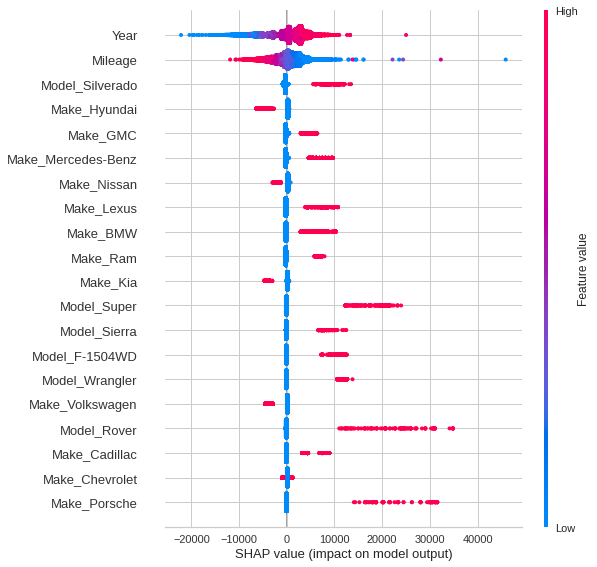

In [14]:
interpret_model(tuned_cat)

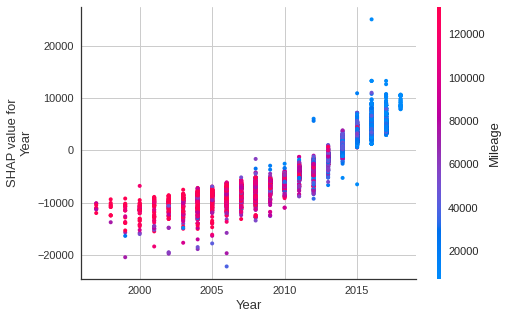

In [15]:
interpret_model(tuned_cat, plot = 'correlation')

In [16]:
interpret_model(tuned_cat, plot = 'reason', observation = 10)